<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/notebooks/10SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a ver este ejemplo interesante que trabaja con varios ficheros de un directorio para incluirlos en un dataframe o ir trabajando directamente con ficheros

# Sales Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
# path

path='/content/drive/MyDrive/uni/Docencia/Colab Notebooks/DataScience/ITBD/data'


#### Import necessary libraries

In [ ]:
import os
import pandas as pd

In [ ]:
path = path + "/Sales_Data"


In [ ]:
path

'/content/drive/MyDrive/uni/Docencia/Colab Notebooks/DataScience/ITBD/data/Sales_Data'

#### Merge data from each month into one CSV

In [ ]:

files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

In [ ]:
from google.colab import files
files.upload() 

In [ ]:
!ls

all_data_copy.csv  drive  sample_data


#### Read in updated dataframe

In [ ]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
!ls

all_data_copy.csv  drive  sample_data


In [ ]:
all_data.shape

(186850, 6)

### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

esta labor siempre es compleja, podemos empezar por el siguiente paso de añadir columnas adicionales y dejar esto para después a no ser de que nos de problemas


##### Drop rows of NAN

no es fácil encontrar NAN fácilmente visualizandolo

In [ ]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# veremos que aparecen 5 ó 6

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
all_data.shape

(186305, 6)

In [ ]:
nan_df.shape

(545, 6)

In [ ]:
all_data.shape

(186305, 6)

##### Get rid of text in order date column

In [ ]:
all_data[all_data['Order Date'].str[0:2]=='Or']   # mal escrito, tenemos que eliminarlo

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185359,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [ ]:
all_data.shape

(185950, 6)

#### Make columns correct type

In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

convertimos a numéricos para evitar errores

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

#### Add month column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


#### Add month column (alternative method)

In [ ]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9


In [ ]:
all_data.drop(['Month 2'], axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9
...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10


#### Add city column

apply es una de las funciones más útiles de pandas

In [ ]:
all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta


esta es la opción buena, pero paso a paso:

In [ ]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA)


## Data Exploration!

Objetvos del trabajo --> preguntas

Estos son ejemplos que dependeran de cada tipo de trabajo, tipo de datos

Aquí se proponen algunas preguntas como ideas

#### Question 1: What was the best month for sales? How much was earned that month? 

hay que calcular cantidad por los precios

y hay que asegurarse que son enteros o float para multiplicar, sino dará error

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95


In [ ]:
all_data.shape

(185950, 11)

In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Month 2', 'Column', 'City', 'Sales'],
      dtype='object')

In [ ]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1.811768e+06,9709,1.822257e+06
2,13449,2.188885e+06,23950,2.202022e+06
3,17005,2.791208e+06,45459,2.807100e+06
4,20558,3.367671e+06,73116,3.390670e+06
5,18667,3.135125e+06,82830,3.152607e+06
6,15253,2.562026e+06,81324,2.577802e+06
7,16072,2.632540e+06,100051,2.647776e+06
8,13448,2.230345e+06,95688,2.244468e+06
9,13109,2.084992e+06,104589,2.097560e+06


In [ ]:
results = all_data.groupby(['Month']).sum()

range(1, 13)


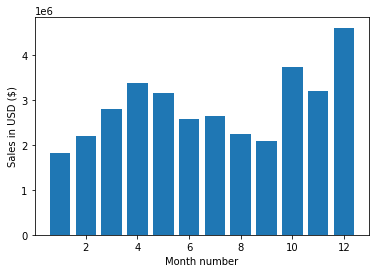

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)  # 13 es exclusivo, siempre el endvalue
print(months)

#plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.bar(months,results['Sales'])
#plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?


In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95


In [ ]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,175741,4.664317e+06
Portland (ME),2750,4.471892e+05,17144,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,315520,8.262204e+06


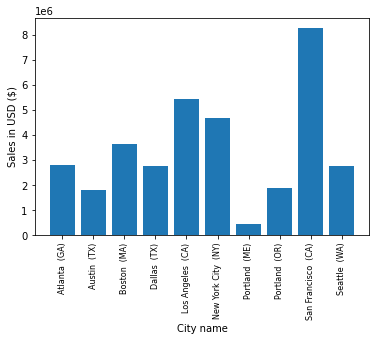

In [ ]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]  # para que los ordene en orden al visualizarlo

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.xticks(keys, rotation='vertical', size=8)   # en vertical el C para que se pueda ver
plt.show()

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

esto estaría muy relacionado con el business

In [ ]:
# lo de siempre, ver el tipo de datos que tenemos con head sobre el dataframe
all_data.head()
# y ahí vemos que necesitamos usar la columna Order Date
#podemos ver qué tipo de dato es por si hay que hacer una conversión
#all_data.dtypes


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95


para ello vamos a utilizar una función muy importante de pandas de conversión 
.to_datetime (datetime, library, ver manual)

convertimos, lleva un poco de tiempo

In [ ]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Month 2               int64
Column               object
City                 object
Sales               float64
dtype: object

In [ ]:
all_data['Order Data'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales,Order Data
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36,2019-09-17 14:44:00
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90,2019-09-29 10:19:00
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95,2019-09-16 17:48:00
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99,2019-09-27 07:52:00
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95,2019-09-01 19:03:00


In [ ]:
# Add hour column
# en realidad añadimos alguna más, aunque realmente sólo nos interesarán las horas, a nivel del business
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales,Order Data,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36,2019-09-17 14:44:00,14,44,1
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90,2019-09-29 10:19:00,10,19,1
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95,2019-09-16 17:48:00,17,48,1
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99,2019-09-27 07:52:00,7,52,1
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95,2019-09-01 19:03:00,19,3,1


In [ ]:
# las agrupaciones es uno de los puntos también más fuertes para analizar datos
# una vez que teneos esto para responder a la pregunta es groupby y plot
all_data.groupby(['Hour']).count()['Count']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

In [ ]:
all_data.groupby(['Hour'])

In [ ]:
x = [h for h, df in all_data.groupby(['Hour'])]
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

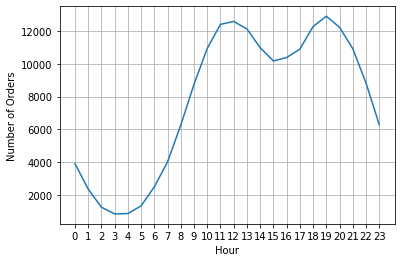

In [ ]:
valoresX = [hour for hour, df in all_data.groupby(['Hour'])]      # simplemente obtener los valoree para eje X, repasar recorrer, iterar en DF
valoresY=all_data.groupby(['Hour']).count()['Count']          #valores del eje Y

plt.plot(valoresX, valoresY)
plt.xticks(valoresX)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()  # para localizarlo mejor
plt.show()

# My recommendation is slightly before 11am or 7pm

Se puede ver según la gráfica cual es el momento en el que más se vende

#### Question 4: What products are most often sold together?

Esto es más complicado, como "enlazamos" productos

In [ ]:
# empezamos como siempre ojeando los datos
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales,Order Data,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36,2019-09-17 14:44:00,14,44,1
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90,2019-09-29 10:19:00,10,19,1
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95,2019-09-16 17:48:00,17,48,1
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99,2019-09-27 07:52:00,7,52,1
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95,2019-09-01 19:03:00,19,3,1


no es sencillo y por eso hay dudas lanzadas en stackoverflow

In [ ]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]    #
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales,Order Data,Hour,Minute,Count
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,9,New York City,New York City (NY),11.95,2019-09-05 15:06:00,15,6,1
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,9,New York City,New York City (NY),11.95,2019-09-05 15:06:00,15,6,1
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,9,San Francisco,San Francisco (CA),700.00,2019-09-27 10:33:00,10,33,1
61,248210,Lightning Charging Cable,1,14.95,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,9,San Francisco,San Francisco (CA),14.95,2019-09-27 10:33:00,10,33,1
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),99.99,2019-09-24 12:48:00,12,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,10/07/19 18:18,"942 11th St, San Francisco, CA 94016",10,10,San Francisco,San Francisco (CA),11.95,2019-10-07 18:18:00,18,18,1
186760,278710,USB-C Charging Cable,1,11.95,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,10,San Francisco,San Francisco (CA),11.95,2019-10-13 19:05:00,19,5,1
186761,278710,27in FHD Monitor,1,149.99,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,10,San Francisco,San Francisco (CA),149.99,2019-10-13 19:05:00,19,5,1
186769,278718,USB-C Charging Cable,1,11.95,10/13/19 12:45,"479 Lincoln St, Atlanta, GA 30301",10,10,Atlanta,Atlanta (GA),11.95,2019-10-13 12:45:00,12,45,1


In [ ]:
df.shape

(14649, 15)

In [ ]:
all_data.shape

(185950, 15)

haciendo esto saco los duplicados
y crearemos una nueva columna que coja los duplicados


In [ ]:

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))   # conseguimos unir o agrupar lo que tiene el mismo id
df2 = df[['Order ID', 'Grouped']].drop_duplicates()       # para eliminar duplicados
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
...,...,...
186700,278653,"iPhone,Lightning Charging Cable"
186745,278697,"Wired Headphones,27in 4K Gaming Monitor"
186755,278706,"Google Phone,USB-C Charging Cable"
186760,278710,"USB-C Charging Cable,27in FHD Monitor"


In [ ]:
df2.shape

(7136, 2)

tenemos a mano df2 para poder verlo

In [ ]:
df2

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
...,...,...
186700,278653,"iPhone,Lightning Charging Cable"
186745,278697,"Wired Headphones,27in 4K Gaming Monitor"
186755,278706,"Google Phone,USB-C Charging Cable"
186760,278710,"USB-C Charging Cable,27in FHD Monitor"


In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

# recorremos el sublist de df2
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))   # aquí tenemos 2, podemos ver 3 items

# para verlo más claro, podríamos verlo print(count) pero quedaría muy lioso, o también eso
for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### y por último

#### What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = all_data.groupby('Product')
print(product_group)
quantity_ordered = product_group.sum()['Quantity Ordered']
print(quantity_ordered)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales,Order Data,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36,2019-09-17 14:44:00,14,44,1
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90,2019-09-29 10:19:00,10,19,1
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95,2019-09-16 17:48:00,17,48,1
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99,2019-09-27 07:52:00,7,52,1
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95,2019-09-01 19:03:00,19,3,1


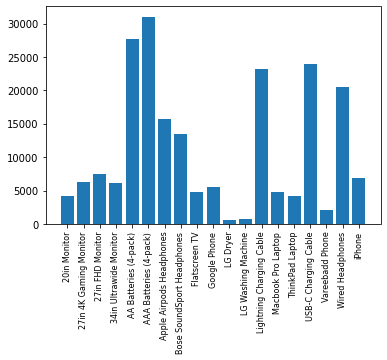

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.show()

parece que los que aparecen más vendidos son los más baratos

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Column,City,Sales,Order Data,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),15.36,2019-09-17 14:44:00,14,44,1
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,9,Austin,Austin (TX),23.90,2019-09-29 10:19:00,10,19,1
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,9,Los Angeles,Los Angeles (CA),11.95,2019-09-16 17:48:00,17,48,1
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,9,Seattle,Seattle (WA),149.99,2019-09-27 07:52:00,7,52,1
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,9,Atlanta,Atlanta (GA),11.95,2019-09-01 19:03:00,19,3,1


In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64